In [39]:
import numpy as np
import pandas as pd
from lumfuncs import LF
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM, z_at_value
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # ignore warnings

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
data = pd.DataFrame(file) # 30,911 galaxies
data = data[data['Use'] == 1] # 13,299 galaxies
data = data[data['FKs'] > 0] # 12,676 galaxies # drop rows if FKs is negative

### Zmax calculation

In [34]:
flux = data['FKs'] # uJy
flux_limit = 27 # AB mangitude
z = data['zpk'] # redshift
distance = cosmo.luminosity_distance(z) # Mpc

flux = 25 - 2.5 * np.log10(flux) # uJy -> AB magnitude
# flux *= 1e-32 # uJy -> W/m^2
# flux_limit = 10 ** ((25 - flux_limit) / 5) # AB magnitude -> uJy
# flux_limit *= 1e-32 # uJy -> W/m^2
distance *= 3.086 * 10 ** 22 # Mpc -> m

luminosity = 4 * np.pi * (distance ** 2) * flux / (1 + z) # Watts

z_max = ((4 * np.pi * (distance ** 2) * flux_limit) / luminosity) - 1
print(z_max)

luminosity = np.log10(luminosity) # Watts -> log10(Watts)
print(luminosity)

5745     3.871671
5859     2.987377
5863     2.471283
5879     2.309138
5885     1.485214
           ...   
30860    1.027665
30872    2.111396
30905    0.871614
30907    1.595058
30909    2.780971
Length: 12676, dtype: float64
5745     55.611436
5859     55.401202
5863     55.244436
5879     55.278867
5885     54.856590
           ...    
30860    54.657334
30872    55.236592
30905    54.465909
30907    54.817591
30909    55.480804
Length: 12676, dtype: float64


In [40]:
flux = data['FKs'] # uJy
flux_limit = 27 # AB mangitude
z = data['zpk'] # redshift
distance = cosmo.luminosity_distance(z) # Mpc

# flux = 25 - 2.5 * np.log10(flux) # uJy -> AB magnitude
flux *= 1e-32 # uJy -> W/m^2
flux_limit = 10 ** ((25 - flux_limit) / 5) # AB magnitude -> uJy
flux_limit *= 1e-32 # uJy -> W/m^2
distance *= 3.086 * 10 ** 22 # Mpc -> m

luminosity = 4 * np.pi * (distance ** 2) * flux # Watts 

limit_distance = np.sqrt(luminosity / (4 * np.pi * flux_limit)) # m
limit_distance *= 3.086 * 10 ** -22 # m -> Mpc

z_max = z_at_value(cosmo.luminosity_distance, limit_distance.values * u.Mpc) # redshift
print(z_max)

luminosity = np.log10(luminosity) # Watts -> log10(Watts)
print(luminosity)

[124.66184659  92.1736154   71.041281   ...   8.64964378  42.75666914
  40.21707112] redshift
5745     24.130510
5859     23.855232
5863     23.616262
5879     23.125753
5885     22.694179
           ...    
30860    21.725073
30872    22.867522
30905    21.609571
30907    23.145585
30909    23.088350
Length: 12676, dtype: float64


[124.66184659  92.1736154   71.041281   ...   8.64964378  42.75666914
  40.21707112] redshift


Text(0, 0.5, 'Log(Luminosity [W])')

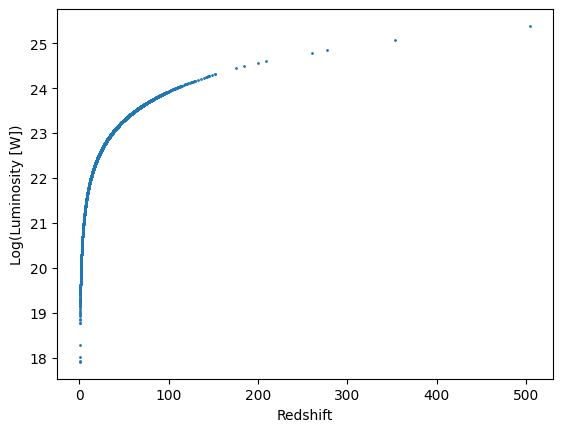

In [41]:
print(z_max)
plt.scatter(z_max, luminosity, s=1)
plt.xlabel('Redshift')
plt.ylabel('Log(Luminosity [W])')

In [ ]:
n_lum_bins = 20 # number of luminosity bins
z_bins = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)] # redshift bins
survey_area = 0.11 # square degrees
lf = LF(cosmo, luminosity, n_lum_bins, z, z_max, z_bins, survey_area)

lf.counts()

data = lf.fit_schechter(func='luminosity', min_count=0, maxfev=1000, show=False)
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True)
for ax, d in zip(axes.flatten(), data):
    x, y, y_fit, (z_start, z_end) = d
    ax.scatter(x, np.log10(y), label=f'{z_start} $\leq$ z < {z_end}')
    ax.plot(x, np.log10(y_fit), label='Schechter fit', color='red', linestyle='--')
    ax.set_xlabel('Log(Luminosity [W])', fontsize=12)
    ax.set_ylabel('$log(\Phi) (Mpc^{-3})$', fontsize=12)
    ax.set_ylim(-8, -1)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend()
plt.show()